In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# CIFAR10 데이터셋 불러오기
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)
trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=64, shuffle=True, num_workers=2
)


Files already downloaded and verified


# Model


In [4]:

# 오토인코더 모델 정의
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(16, 8, kernel_size=3, stride=2, padding=1),
            nn.ReLU(True),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=2, padding=1),
            nn.Tanh(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


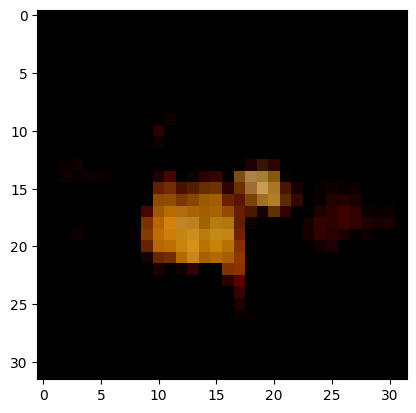

In [23]:
import numpy as np
a = trainset[3][0]
a = a.numpy()
a = a.transpose(1,2,0)
plt.imshow(a)

In [15]:
# train image data
trainset[0][0].shape
# train lable data
trainset[0][1]

6

In [13]:
a =  {'image':[1,2,3],'mask':[4,5,6]}

xx = False
image=  [10,20,3]
label = [4,5,60]
k = a['image'] if xx else a['mask']
kk = {"image": image, "mask": label} if xx else {"image": image}

print(kk.keys())

dict_keys(['image'])


In [ ]:


# 모델 인스턴스 생성 및 장치로 이동
autoencoder = Autoencoder().to(device)

# 손실 함수와 최적화 알고리즘 설정
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# 모델 학습
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, _ = data
        inputs = inputs.to(device)

        optimizer.zero_grad()

        # Forward 및 backward
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        # 통계 출력
        running_loss += loss.item()
        if i % 200 == 199:
            print(f"[{epoch+1}, {i+1}] loss: {running_loss/200:.4f}")
            running_loss = 0.0

print("학습이 완료되었습니다.")

# 잠재 벡터 추출
latent_vectors = []
with torch.no_grad():
    for data in trainloader:
        images, _ = data
        images = images.to(device)
        latent_vector = autoencoder.encoder(images)
        latent_vectors.append(latent_vector.cpu())

latent_vectors = torch.cat(latent_vectors, dim=0)

# 잠재 벡터 시각화
fig, ax = plt.subplots()
ax.scatter(latent_vectors[:, 0], latent_vectors[:, 1], c="blue", alpha=0.7)


In [1]:
!pip install --quiet optuna

In [2]:
import optuna
oputuna.__version__

NameError: name 'oputuna' is not defined